# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
# path = untar_data(URLs.PETS); path
path = Path( 'data' )

In [6]:
path.ls()

[PosixPath('data/alligator'),
 PosixPath('data/crocodile'),
 PosixPath('data/urls_crocodile.txt'),
 PosixPath('data/models'),
 PosixPath('data/urls_alligator.txt'),
 PosixPath('data/.ipynb_checkpoints')]

In [7]:
# path_anno = path/'annotations'
# path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [8]:
# fnames = get_image_files(path_img)
# fnames[:5]

In [9]:
# np.random.seed(2)
# pat = r'/([^/]+)_\d+.jpg$'

In [25]:
# data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
#                                   ).normalize(imagenet_stats)

np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, bs = bs, num_workers=4).normalize(imagenet_stats)

# np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=160, bs = 32, num_workers=4).normalize(imagenet_stats)

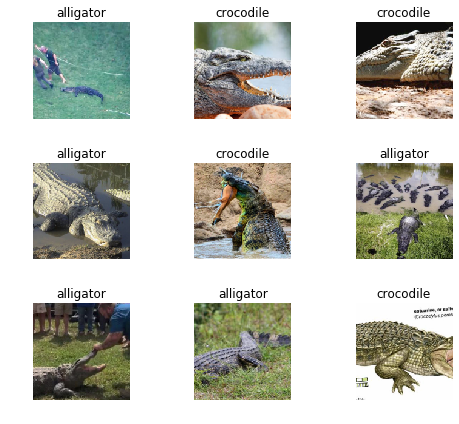

In [26]:
data.show_batch(rows=3, figsize=(7,6))

In [27]:
print(data.classes)
len(data.classes),data.c

['alligator', 'crocodile']


(2, 2)

## Training: resnet34

## STAGE 1

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [28]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [29]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [30]:
# learn.fit_one_cycle(4)
learn.fit_one_cycle(2)

In [31]:
learn.save('stage-1-34')

### Results for STAGE 1

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [65]:
learn.load('stage-1-34')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (300 items)
[Category alligator, Category alligator, Category alligator, Category alligator, Category alligator]...
Path: data
x: ImageItemList (300 items)
[Image (3, 333, 500), Image (3, 261, 500), Image (3, 333, 500), Image (3, 250, 500), Image (3, 500, 375)]...
Path: data;

Valid: LabelList
y: CategoryList (74 items)
[Category crocodile, Category alligator, Category alligator, Category crocodile, Category alligator]...
Path: data
x: ImageItemList (74 items)
[Image (3, 312, 500), Image (3, 332, 500), Image (3, 327, 500), Image (3, 333, 500), Image (3, 281, 500)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

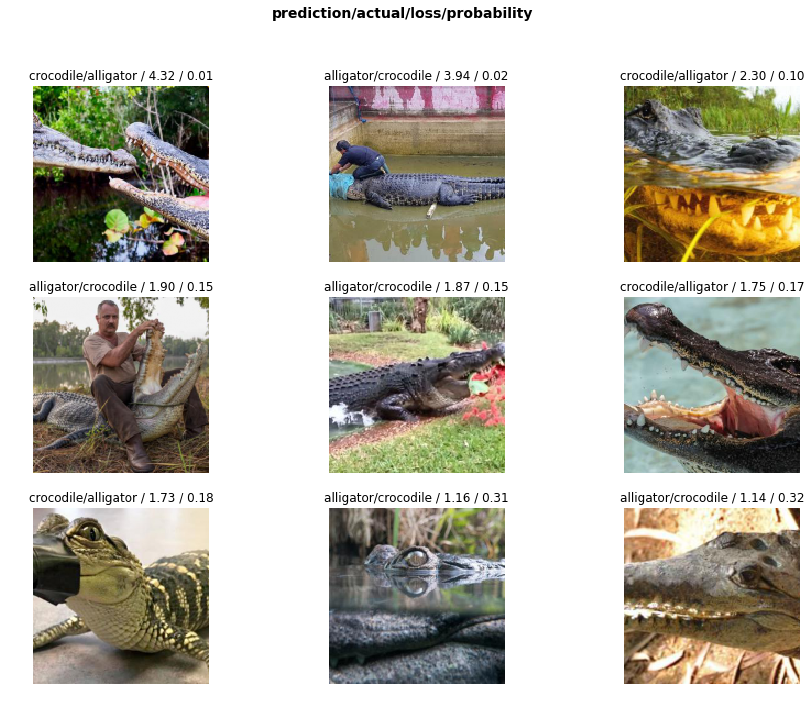

In [67]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

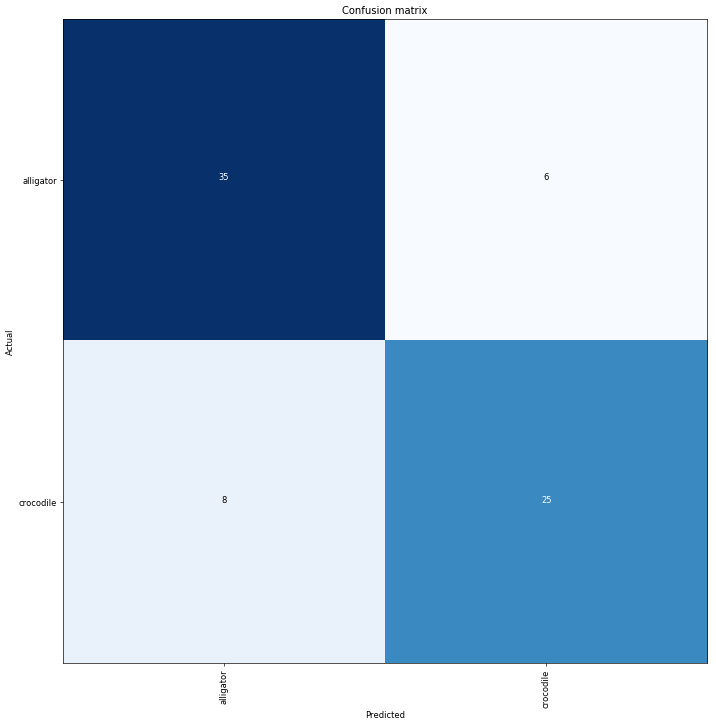

In [59]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
interp.most_confused(min_val=2)

[('crocodile', 'alligator', 8), ('alligator', 'crocodile', 6)]

## STAGE 2: Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [36]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(1)

In [46]:
learn.load('stage-1-34');

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


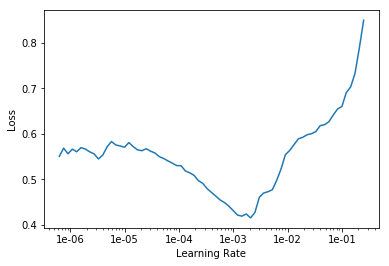

In [48]:
learn.recorder.plot()

In [49]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(5e-5,5e-3))

In [62]:
learn.save('stage-2-34')

That's a pretty accurate model!

### Results for STAGE 2

In [68]:
learn.load('stage-2-34')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (300 items)
[Category alligator, Category alligator, Category alligator, Category alligator, Category alligator]...
Path: data
x: ImageItemList (300 items)
[Image (3, 333, 500), Image (3, 261, 500), Image (3, 333, 500), Image (3, 250, 500), Image (3, 500, 375)]...
Path: data;

Valid: LabelList
y: CategoryList (74 items)
[Category crocodile, Category alligator, Category alligator, Category crocodile, Category alligator]...
Path: data
x: ImageItemList (74 items)
[Image (3, 312, 500), Image (3, 332, 500), Image (3, 327, 500), Image (3, 333, 500), Image (3, 281, 500)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

In [69]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

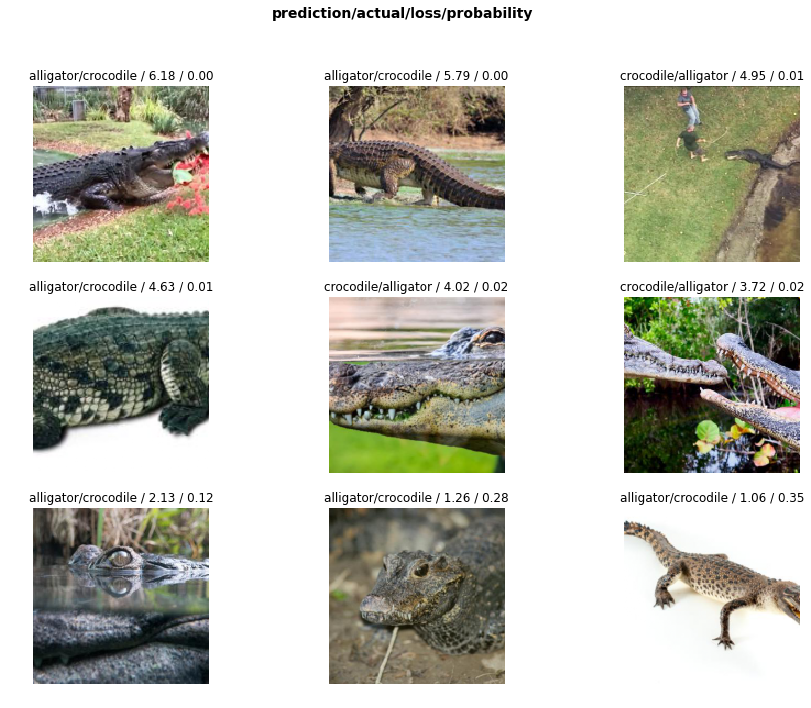

In [70]:
interp.plot_top_losses(9, figsize=(15,11))

In [71]:
doc(interp.plot_top_losses)

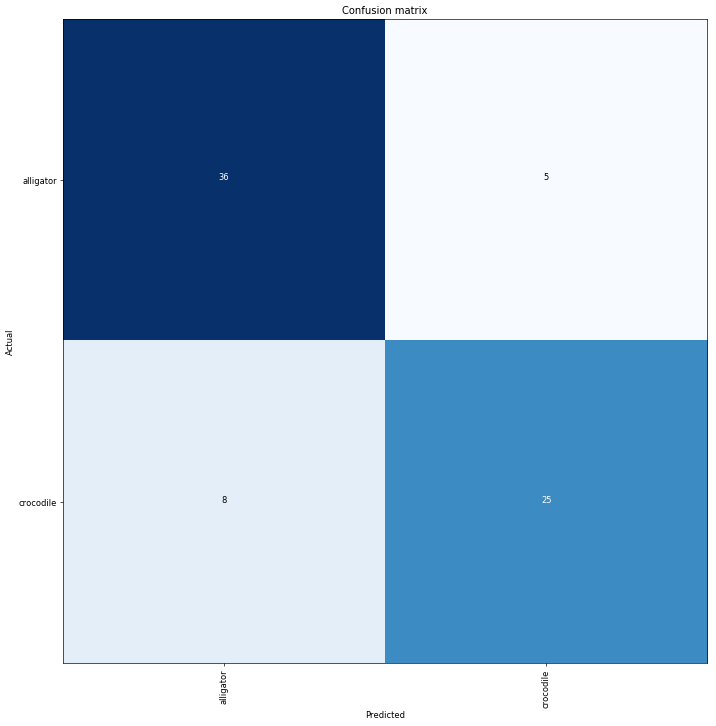

In [72]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [73]:
interp.most_confused(min_val=2)

[('crocodile', 'alligator', 8), ('alligator', 'crocodile', 5)]

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [113]:
# data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
#                                    size=299, bs=bs//2).normalize(imagenet_stats)

# np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs = 32, num_workers=4).normalize(imagenet_stats)

In [114]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


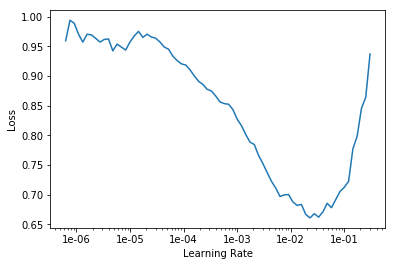

In [115]:
learn.lr_find()
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(3)

In [117]:
learn.save('stage-1-50')

In [137]:
learn.load('stage-1-50');

In [138]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

In [139]:
# learn.save('stage-2-50')
learn.load( 'stage-2-50' )

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (300 items)
[Category alligator, Category alligator, Category alligator, Category alligator, Category alligator]...
Path: data
x: ImageItemList (300 items)
[Image (3, 263, 499), Image (3, 333, 500), Image (3, 220, 350), Image (3, 333, 500), Image (3, 281, 500)]...
Path: data;

Valid: LabelList
y: CategoryList (74 items)
[Category crocodile, Category alligator, Category alligator, Category crocodile, Category alligator]...
Path: data
x: ImageItemList (74 items)
[Image (3, 166, 500), Image (3, 259, 500), Image (3, 331, 500), Image (3, 281, 500), Image (3, 281, 500)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

If it doesn't, you can always go back to your previous model.

In [140]:
interp = ClassificationInterpretation.from_learner(learn)

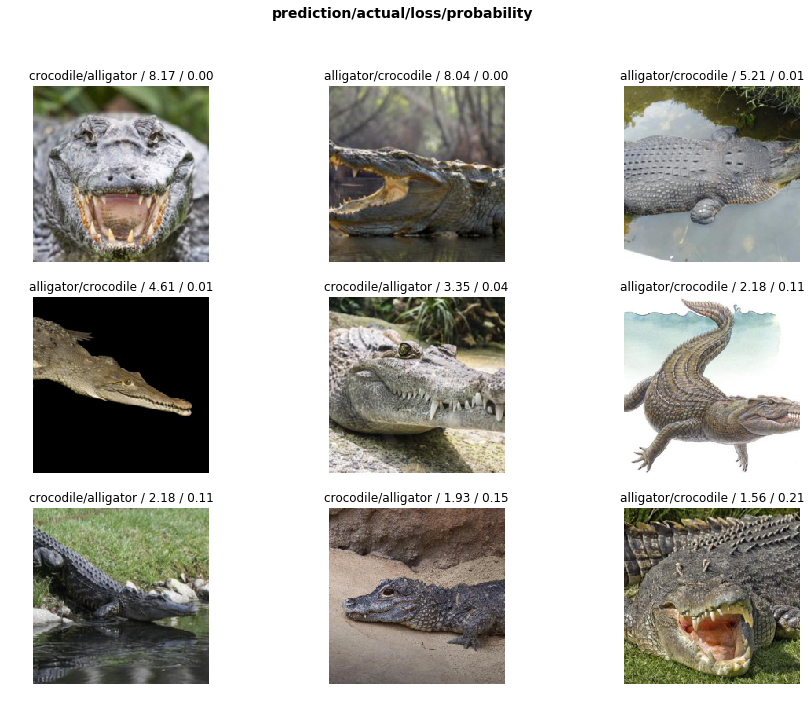

In [141]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11))

In [142]:
interp.most_confused(min_val=2)

[('alligator', 'crocodile', 7), ('crocodile', 'alligator', 5)]

## ------------------------------------------------------------------------------------------------
_The below "Cleaning Up" section is added from_ __lesson2-download.ipynb__

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [74]:
learn.load('stage-1-34')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (300 items)
[Category alligator, Category alligator, Category alligator, Category alligator, Category alligator]...
Path: data
x: ImageItemList (300 items)
[Image (3, 333, 500), Image (3, 261, 500), Image (3, 333, 500), Image (3, 250, 500), Image (3, 500, 375)]...
Path: data;

Valid: LabelList
y: CategoryList (74 items)
[Category crocodile, Category alligator, Category alligator, Category crocodile, Category alligator]...
Path: data
x: ImageItemList (74 items)
[Image (3, 312, 500), Image (3, 332, 500), Image (3, 327, 500), Image (3, 333, 500), Image (3, 281, 500)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

In [75]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [76]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [77]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [79]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [80]:
ImageCleaner(ds, idxs, path, duplicates=True)

'No images to show :). 19 pairs were skipped since at least one of the images was deleted by the user.'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Re-train from STAGE 1 RESNET34

In [81]:
path.ls()

[PosixPath('data/alligator'),
 PosixPath('data/crocodile'),
 PosixPath('data/cleaned.csv'),
 PosixPath('data/urls_crocodile.txt'),
 PosixPath('data/models'),
 PosixPath('data/urls_alligator.txt'),
 PosixPath('data/.ipynb_checkpoints')]

In [82]:
# path_anno = path/'annotations'
# path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [83]:
# fnames = get_image_files(path_img)
# fnames[:5]

In [84]:
# np.random.seed(2)
# pat = r'/([^/]+)_\d+.jpg$'

In [171]:
# data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
#                                   ).normalize(imagenet_stats)

np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, bs = bs, num_workers=4).normalize(imagenet_stats)

# np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=160, bs = 32, num_workers=4).normalize(imagenet_stats)

# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=160, bs = 32, num_workers=4).normalize(imagenet_stats)

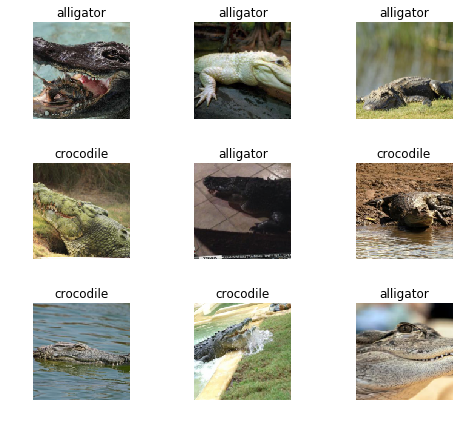

In [172]:
data.show_batch(rows=3, figsize=(7,6))

In [173]:
print(data.classes)
len(data.classes),data.c

['alligator', 'crocodile']


(2, 2)

## RETRY AFTER CLEANING: Training: resnet34

## RETRY AFTER CLEANING: STAGE 1

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [174]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [175]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [178]:
# learn.fit_one_cycle(4)
learn.fit_one_cycle(2)

In [179]:
learn.save('stage-1-34-cleaned')

### Results for STAGE 1

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [180]:
learn.load('stage-1-34-cleaned')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (232 items)
[Category alligator, Category alligator, Category alligator, Category alligator, Category alligator]...
Path: data
x: ImageItemList (232 items)
[Image (3, 333, 500), Image (3, 261, 500), Image (3, 333, 500), Image (3, 250, 500), Image (3, 500, 375)]...
Path: data;

Valid: LabelList
y: CategoryList (58 items)
[Category alligator, Category crocodile, Category alligator, Category crocodile, Category crocodile]...
Path: data
x: ImageItemList (58 items)
[Image (3, 333, 500), Image (3, 332, 500), Image (3, 350, 500), Image (3, 281, 500), Image (3, 500, 500)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

In [181]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

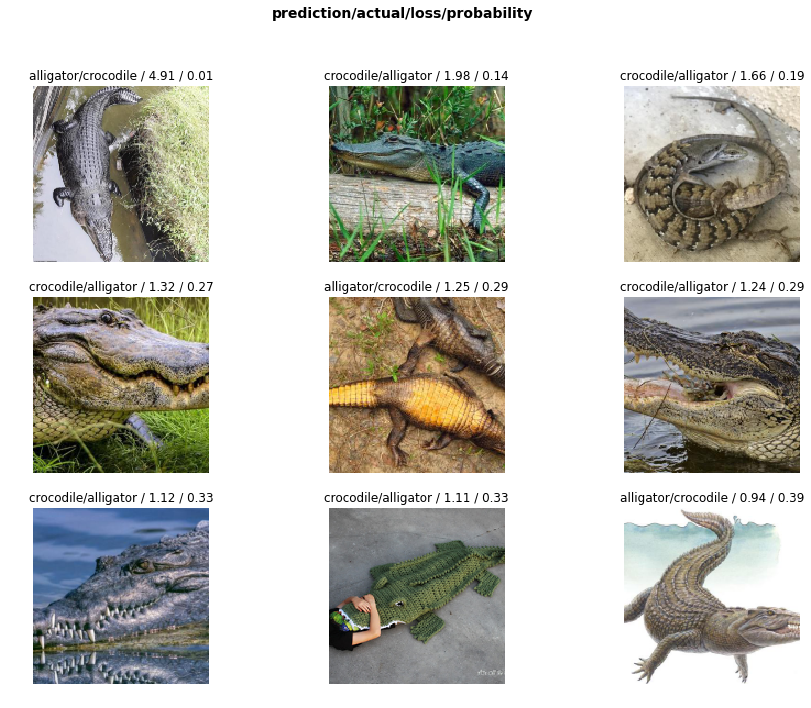

In [182]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

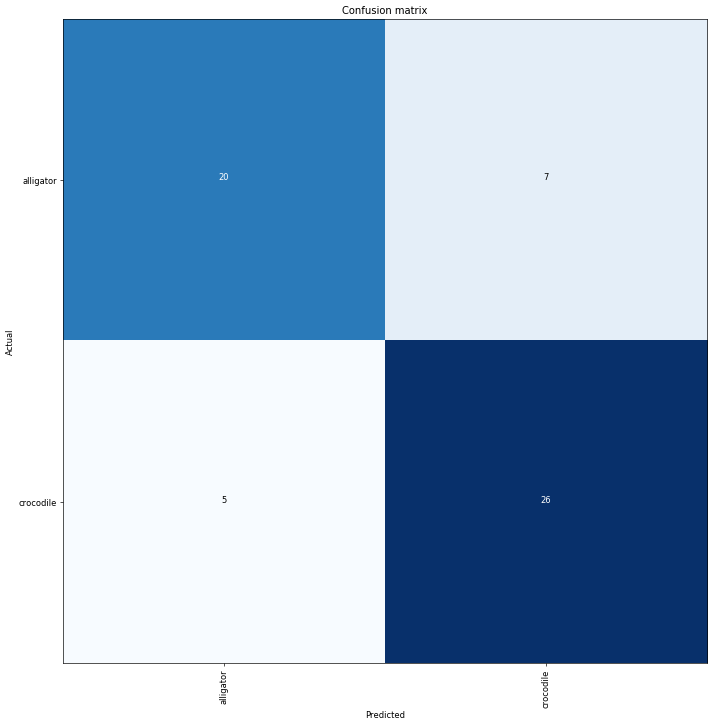

In [183]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [184]:
interp.most_confused(min_val=2)

[('alligator', 'crocodile', 7), ('crocodile', 'alligator', 5)]

## STAGE 2: Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [185]:
learn.unfreeze()

In [186]:
learn.fit_one_cycle(1)

In [213]:
learn.load('stage-1-34-cleaned');

In [188]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


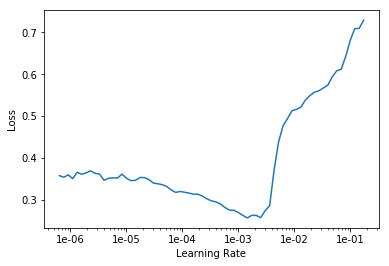

In [189]:
learn.recorder.plot()

In [214]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [215]:
learn.save('stage-2-34-cleaned')

<font color=blue>__All in all, best you can do from all your tests on crocodiles vs alligators is _~86%_. And I think that's ok; I still can't tell the difference between them, the only real visible difference seems to be their snout, but the variance amongst different species of alligators and crocodiles respectively is just so high that the model probably can't pinpoint the whole snout-difference domain knowledge thing amongst all the mess in the same way a human who doesn't know about the snout thing wouldn't (so the model DOES <font color=red>NOT</font> seem to be making <font color=red>naive</font> mistakes, which is the important part), and the cropping removes a lot of the snout a lot of the time (an unfortunate result of scraping all of my images from Google Images and thus the images being all sorts of shapes and sizes)__</font>

### Results for STAGE 2

In [216]:
learn.load('stage-2-34-cleaned')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (232 items)
[Category alligator, Category alligator, Category alligator, Category alligator, Category alligator]...
Path: data
x: ImageItemList (232 items)
[Image (3, 333, 500), Image (3, 261, 500), Image (3, 333, 500), Image (3, 250, 500), Image (3, 500, 375)]...
Path: data;

Valid: LabelList
y: CategoryList (58 items)
[Category alligator, Category crocodile, Category alligator, Category crocodile, Category crocodile]...
Path: data
x: ImageItemList (58 items)
[Image (3, 333, 500), Image (3, 332, 500), Image (3, 350, 500), Image (3, 281, 500), Image (3, 500, 500)]...
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

In [217]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

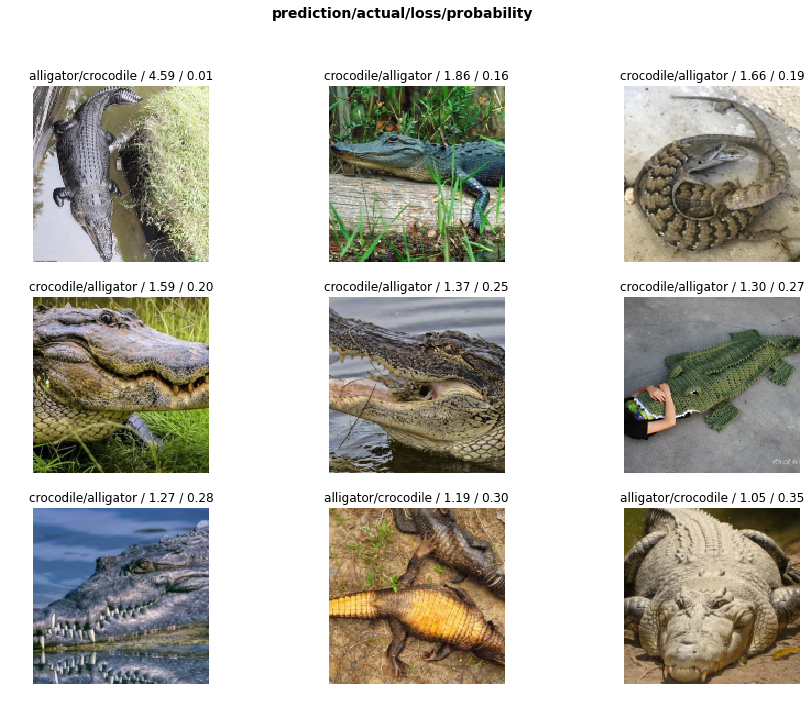

In [218]:
interp.plot_top_losses(9, figsize=(15,11))

In [219]:
doc(interp.plot_top_losses)

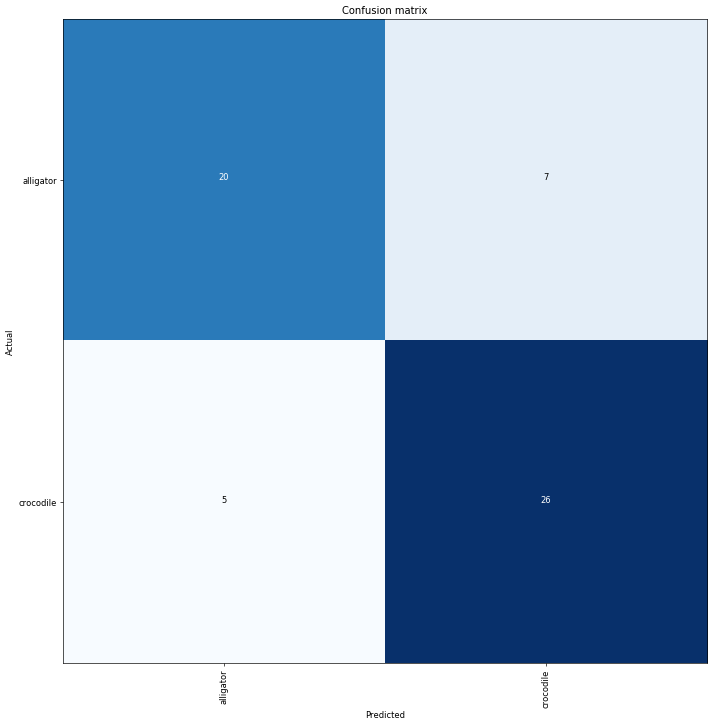

In [220]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [221]:
interp.most_confused(min_val=2)

[('alligator', 'crocodile', 7), ('crocodile', 'alligator', 5)]

<font color=blue>__All in all, best you can do from all your tests on crocodiles vs alligators is _~86%_. And I think that's ok; I still can't tell the difference between them, the only real visible difference seems to be their snout, but the variance amongst different species of alligators and crocodiles respectively is just so high that the model probably can't pinpoint the whole snout-difference domain knowledge thing amongst all the mess in the same way a human who doesn't know about the snout thing wouldn't (so the model DOES <font color=red>NOT</font> seem to be making <font color=red>naive</font> mistakes, which is the important part), and the cropping removes a lot of the snout a lot of the time (an unfortunate result of scraping all of my images from Google Images and thus the images being all sorts of shapes and sizes)__</font>

## ------------------------------------------------------------------------------------------------

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample')

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

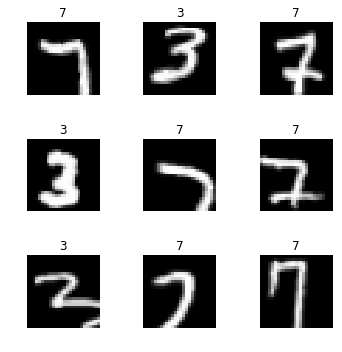

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      0.116117    0.029745    0.991168  (00:12)
2      0.056860    0.015974    0.994603  (00:10)



In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

name  label
0   train/3/7463.png      0
1  train/3/21102.png      0
2  train/3/31559.png      0
3  train/3/46882.png      0
4  train/3/26209.png      0

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

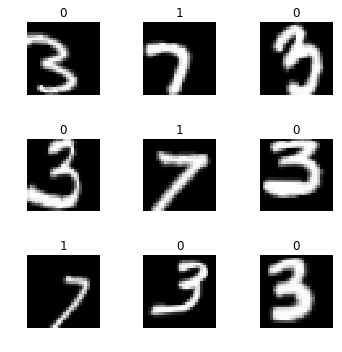

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [ ]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']